# Template Matching


[Template matching (Wikipedia)](https://en.wikipedia.org/wiki/Template_matching)

[Template Matching (OpenCV doc)](https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html)

[Template Matching](https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html)


* the simplest form of object detection
* scans a larger image for a provided template by sliding the template target image across the larger image
* a choice on comparison method used; these methods are all some sort of correlation-based metric: [TemplateMatchModes](https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#gga3a7850640f1fe1f58fe91a2d7583695dac5babb7dfda59544e3e31ea928f8cb16)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

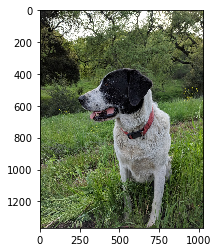

In [4]:
# load a large image, inside which we'll be looking for a pattern
full = cv2.imread('../data/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

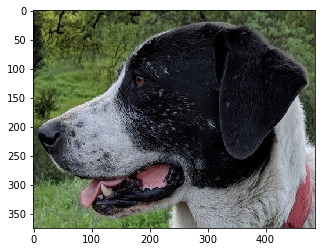

In [6]:
# load a template image, the one which we'll be searching within the large image
face = cv2.imread('../data/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [7]:
full.shape

(1367, 1025, 3)

In [8]:
face.shape

(375, 486, 3)

[cv2.matchTemplate()](https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be) compares a template against overlapped image regions and creates a grayscale heatmap. 

_After the function finishes the comparison, the best matches can be found as global minimums (when TM_SQDIFF was used) or maximums (when TM_CCORR or TM_CCOEFF was used) using the minMaxLoc function._

_In case of a color image, template summation in the numerator and each sum in the denominator is done over all of the channels and separate mean values are used for each channel. That is, the function can take a color template and a color image. The result will still be a single-channel image, which is easier to analyze._

[python - Maxvalue in cv2.minMaxLoc()? - Stack Overflow](https://stackoverflow.com/questions/45047808/maxvalue-in-cv2-minmaxloc):
_cv2.matchTemplate returns a correlation map, essentially a grayscale image, where each pixel denotes how much does the neighborhood of that pixel match with the template._
_cv2.minMaxLoc() function returns the max and min intensity values in a Mat or an array along with the location of these intensities._

For non-SQDIFF methods brighter colours (max values) appear at the location where match is found. 

For SQDIFF methods darker colours (min values) appear at the location where match is found.

[computer vision - What does the TM_CCORR and TM_CCOEFF in opencv mean? - Stack Overflow](https://stackoverflow.com/questions/55469431/what-does-the-tm-ccorr-and-tm-ccoeff-in-opencv-mean)

From "Learning OpenCV 3: Computer Vision in C++ with the OpenCV Library" By Adrian Kaehler, Gary Bradski:

**TM_CCORR** = Cross correlation; a direct ("simplest") correlation between template and image: result pixel is the sum of the dot product of between the template pixel and and image pixel for each pixel in the template. (The *dot product* is the sum of the products of the corresponding entries of the two sequences of numbers

**TM_CCOEFF** = Correlation coefficient; takes into account the dimensions of the template and image along with the sum of the pixel intensities.

**TM_SQDIFF** = Square Difference; uses the squared distance between template and image pixel intensities.

_The square-difference methods show best matches with a minimum, whereas the correlation and correlation-coefficient methods show best matches at
maximum points._

_We obtain more accurate matches (at the cost of more computations) as we move from simpler measures (square difference) to more sophisticated ones (correlation coefficient). It’s best to do some test trials of all these settings and then choose the one that best trades off accuracy for speed in your application._

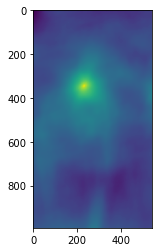

In [12]:
res = cv2.matchTemplate(full, face, eval('cv2.TM_CCOEFF'))
plt.imshow(res)

min_value = -735580608.0, max_value = 1755388672.0


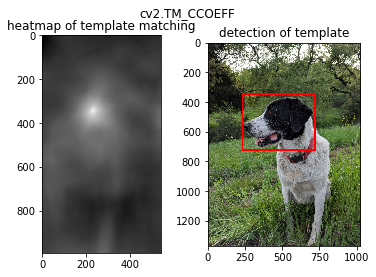




min_value = -0.32965779304504395, max_value = 0.9982755780220032


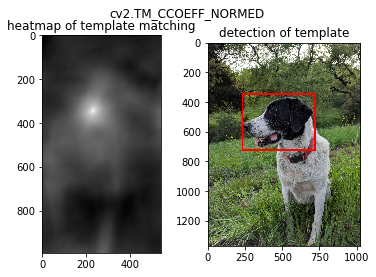




min_value = 2240523776.0, max_value = 5224793600.0


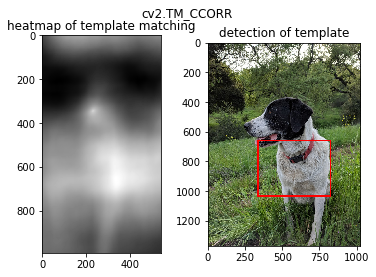




min_value = 0.4976869225502014, max_value = 0.9993349313735962


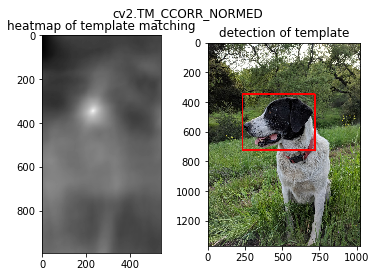




min_value = 6403460.0, max_value = 6297628672.0


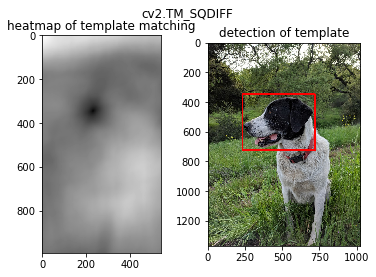




min_value = 0.001331940176896751, max_value = 1.0


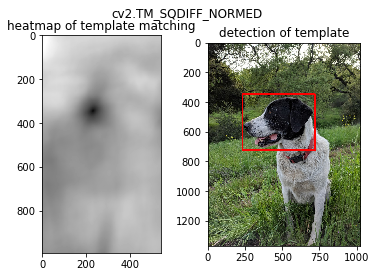

In [20]:
# here are all TemplateMatchModes listed as strings in an array
methods = [
    'cv2.TM_CCOEFF',
    'cv2.TM_CCOEFF_NORMED',
    'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED',
    'cv2.TM_SQDIFF', 
    'cv2.TM_SQDIFF_NORMED',
]

for m in methods:
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy, face, method)
    min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(res)
    
    print(f'min_value = {min_value}, max_value = {max_value}')
    
    # min_loc (or max_loc) are locations of the top left corner of the pattern found in the full image
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = face.shape    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    # draw one raw with two columns,take 1st (left) image
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('detection of template')
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')